In [1]:
!nrnivmodl ghchan.mod kca2.mod kdrRL.mod L_Ca.mod mAHP.mod na3rp.mod naps.mod

/home/user/anaconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/user/Desktop/MiceNEURON
Mod files: "./ghchan.mod" "./kca2.mod" "./kdrRL.mod" "./L_Ca.mod" "./mAHP.mod" "./na3rp.mod" "./naps.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [3]:
from neuron import h, gui

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [5]:
h.load_file("nrngui.hoc")
h.load_file("1_mosinit_mouse.hoc")

	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 


1.0

In [7]:
sections = h.allsec()
#for sec in sections:
#    print(sec.name())

In [9]:
#h.soma.psection()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Rheobase is approximately 0.90 nA


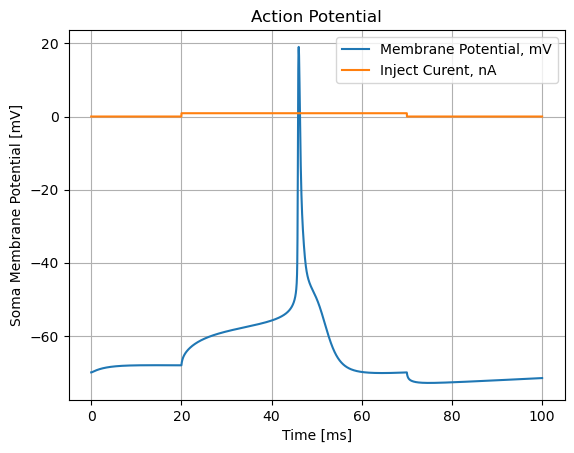

In [13]:
# Start with a small current and gradually increase it
current_amplitudes = np.arange(0, 10.0,0.1)
rheobase = None

for amp in current_amplitudes:
    iclamp = h.IClamp(h.soma(0.5))
    iclamp.delay = 20  # Delay in ms before the stimulus starts
    iclamp.dur = 50   # Duration of the stimulus in ms (long enough to test rheobase)
    iclamp.amp = amp 

    # Prepare to record time and voltage
    t_vec = h.Vector().record(h._ref_t)
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)
    i_vec = h.Vector().record(iclamp._ref_i)
    
    h.finitialize(-70)
    while h.t < 100:
        h.fadvance()

        # Convert recorded vectors to NumPy arrays
    v_d= np.array(v_vec)
    t_d= np.array(t_vec)
    i_d= np.array(i_vec)
    if np.max(v_d) > -10:
        rheobase = amp
        break 

if rheobase is not None:
    print(f"Rheobase is approximately {rheobase:.2f} nA")
else:
    print("No spikes were elicited with the tested current range.")

plt.plot(t_d, v_d, label="Membrane Potential, mV")
plt.plot(t_d, i_d, label="Inject Curent, nA")
plt.xlabel('Time [ms]')
plt.ylabel('Soma Membrane Potential [mV]')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

Resting membrane potential: -68.34 mV
Peak of the action potential: 26.31 mV
Action potential height: 94.65 mV
Latency to peak: 2.47 ms


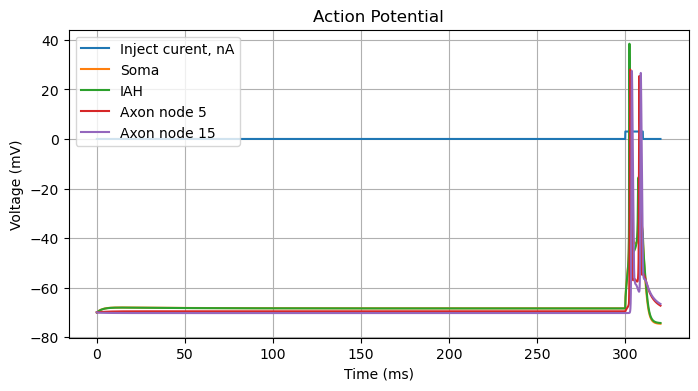

In [14]:
#set up inject pulse current
h.t = 0  # Reset time
iclamp.amp = 0
h.fcurrent()  # Recalculate currents if needed
IC = h.IClamp(h.soma(0.5))
IC.delay = 300
IC.dur = 10
IC.amp = 3

# Prepare to record time and voltage
t_vec = h.Vector().record(h._ref_t)
v_soma = h.Vector().record(h.soma(0.5)._ref_v)
i_soma = h.Vector().record(IC._ref_i)
v_ah = h.Vector().record(h.IS(0.5)._ref_v)
v_ax5 = h.Vector().record(h.node[5](0.5)._ref_v)
v_ax15 = h.Vector().record(h.node[15](0.5)._ref_v)
h.finitialize(-70)
# Run the simulation
while h.t < 320:
    h.fadvance()

t = np.array(t_vec)
vs = np.array(v_soma)
i_s = np.array(i_soma)
vah = np.array(v_ah)
vax5 = np.array(v_ax5)
vax15 = np.array(v_ax15)

# Calculate the resting membrane potential (before stimulation)
v_rest = np.mean(vs[t < IC.delay])

# Identify the peak of the action potential
v_peak = np.max(vs)

# Calculate the AP height
ap_height = v_peak - v_rest

latency = 0
for i in range(len(vs)):
    if vs[i] == v_peak:
        latency = t[i] - IC.delay
        break 

print(f"Resting membrane potential: {v_rest:.2f} mV")
print(f"Peak of the action potential: {v_peak:.2f} mV")
print(f"Action potential height: {ap_height:.2f} mV")
print(f"Latency to peak: {latency:.2f} ms")
plt.figure(figsize=(8, 4))
plt.plot(t, i_s, label="Inject curent, nA")
plt.plot(t, vs, label="Soma")
plt.plot(t, vah, label="IAH")
plt.plot(t,vax5, label="Axon node 5")
plt.plot(t,vax15, label = "Axon node 15")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential')
plt.legend()
plt.grid()
plt.show()

Input Resistance: -11.93 MΩ
Input Conductance: -0.084 µS


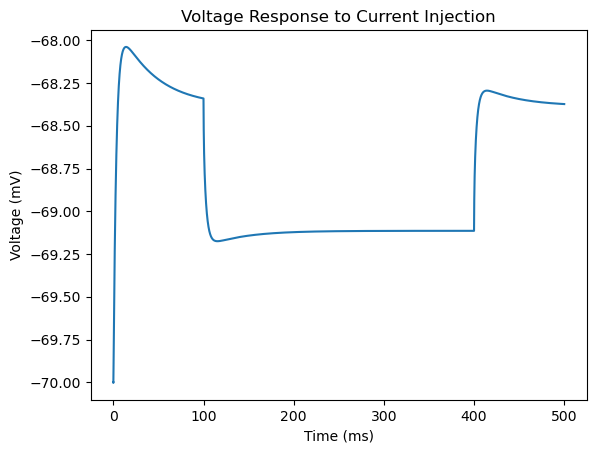

In [15]:
### Input resistance 

h.t = 0  # Reset time
IC.amp = 0
h.fcurrent()  # Recalculate currents if needed
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 100
iclamp.dur = 300
iclamp.amp = -0.1

# Record voltage
t = h.Vector()
v = h.Vector()
t.record(h._ref_t)
v.record(h.soma(0.5)._ref_v)

h.finitialize(-70)
# Run the simulation
while h.t < 500:
    h.fadvance()
# Calculate input resistance

import numpy as np
import matplotlib.pyplot as plt

steady_state_v = np.mean(v.as_numpy()[int(len(v)/2):])  # Take mean after stabilization
delta_v = steady_state_v - np.mean(v[t < iclamp.delay])
rin = delta_v / iclamp.amp  # In MΩ
gin = 1 / rin  # µS

print(f"Input Resistance: {rin:.2f} MΩ")
print(f"Input Conductance: {gin:.3f} µS")
# Plot results
plt.plot(t, v)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage Response to Current Injection')
plt.show()

In [ ]:
h.t = 0  # Reset time
iclamp.amp =0
h.fcurrent()  
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 0    # Start immediately
iclamp.dur = 3000   # Duration of the stimulus in ms, for example

# Simulation parameters
h.dt = 0.0025  # Time step in ms
h.tstop = 3000  # Total simulation time in ms

# Time vector
t_vec = np.arange(0, h.tstop, h.dt)

# Triangular ramp parameters
peak_time = 1500  # Time at which the ramp peaks (ms)
peak_current = 7.0  # Peak current amplitude (nA)


# Create a triangular current ramp
current_ramp = np.zeros_like(t_vec)
ramp_up = (peak_current / peak_time) * t_vec[t_vec <= peak_time]
ramp_down = - (peak_current / (h.tstop - peak_time)) * (t_vec[t_vec > peak_time] - peak_time) + peak_current

# Apply the ramp up and ramp down
current_ramp[:len(ramp_up)] = ramp_up
current_ramp[len(ramp_up):] = ramp_down

# Convert the current ramp to an NEURON Vector and play it into IClamp
current_vec = h.Vector(current_ramp)
time_vec = h.Vector(t_vec)
current_vec.play(iclamp._ref_amp, time_vec)


# Prepare to record time, voltage, and current
t_record = h.Vector().record(h._ref_t)
v_record = h.Vector().record(h.soma(0.5)._ref_v)
i_record = h.Vector().record(iclamp._ref_i)

# Manually set the IClamp amplitude during the simulation
for i, t in enumerate(t_vec):
    iclamp.amp = current_ramp[i]  # Update the IClamp amplitude
    h.fadvance()  # Advance the simulation by one time step

In [ ]:
h.t = 0  # Reset time
iclamp.amp =0
h.fcurrent()  
h.finitialize(-70)
while h.t < 3000:
    h.fadvance()

t_data = np.array(t_record)
v_data = np.array(v_record)
i_data = np.array(i_record)
#ina_data = np.array(ina_vec)

# Plot membrane potential vs. time
plt.figure(figsize=(8, 4))
plt.plot(t_data, v_data, label='Membrane potential (mV)')
plt.plot(t_data, i_data, label='Inject Ramp current (nA)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Membrane Potential vs. Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Spike detection: Find where membrane potential crosses threshold (0 mV)
threshold = 0  # Spike detection threshold
spike_times = []
curent =[]
for i in range(len(t_data)):
    if v_data[i] > threshold:
        spike_times.append(t_data[i])
        curent.append(i_data[i])

# Calculate the time of the first and last spikes
if len(spike_times) > 0:
    first_spike_time = spike_times[0]
    last_spike_time = spike_times[-1]
    first_spike_curent = curent[0]
    print(f"Time until the first spike: {first_spike_time} ms")
    print(f"Time of the last spike: {last_spike_time} ms")
    print(f"Recruitment curent: {first_spike_curent} nA")
else:
    print("No spikes detected during the simulation.")

In [ ]:
from scipy.signal import find_peaks

# Sample data (replace with your actual data)
x = t_data
y = v_data
i = i_data
# Find peaks
peaks, _ = find_peaks(y,height=-20)

# Compute the periods (differences between consecutive peaks)
x_peaks = x[peaks]
periods = np.diff(x_peaks)
i_peaks = i[peaks]
# Compute the frequencies (f = 1 / period)
frequencies = 1000 / periods

# Associate each frequency with the corresponding x-value (midpoint of the interval)
x_midpoints = (x_peaks[:-1] + x_peaks[1:]) / 2
i_midp = (i_peaks[:-1] + i_peaks[1:])/2

# Plot frequency vs x
plt.plot(i_midp, frequencies)
plt.xlabel('Current (nA)')
plt.ylabel('Frequency (Hz)')
plt.title('F-I')
plt.grid()
plt.show()

from scipy.stats import linregress

# Perform linear regression to get the global slope
slope, intercept, r_value, p_value, std_err = linregress(i_midp, frequencies)

# Print the slope
print(f"Slope of the global linear fit: {slope}")

In [ ]:
h.t = 0  # Reset time
iclamp.amp =0
h.fcurrent()  
iclamp = h.IClamp(h.soma(0.5))
iclamp.delay = 0    # Start immediately
iclamp.dur = 3000   # Duration of the stimulus in ms, for example

# Simulation parameters
h.dt = 0.0025  # Time step in ms
h.tstop = 3000  # Total simulation time in ms
# Time vector
t_vec = np.arange(0, h.tstop, h.dt)

# Triangular ramp parameters
peak_time = 1500  # Time at which the ramp peaks (ms)
peak_current = 10.0  # Peak current amplitude (nA)


# Create a triangular current ramp
current_ramp = np.zeros_like(t_vec)
ramp_up = (peak_current / peak_time) * t_vec[t_vec <= peak_time]
ramp_down = - (peak_current / (h.tstop - peak_time)) * (t_vec[t_vec > peak_time] - peak_time) + peak_current

# Apply the ramp up and ramp down
current_ramp[:len(ramp_up)] = ramp_up
current_ramp[len(ramp_up):] = ramp_down

# Convert the current ramp to an NEURON Vector and play it into IClamp
current_vec = h.Vector(current_ramp)
time_vec = h.Vector(t_vec)
current_vec.play(iclamp._ref_amp, time_vec)


# Prepare to record time, voltage, and current
t_record = h.Vector().record(h._ref_t)
v_record = h.Vector().record(h.soma(0.5)._ref_v)
i_record = h.Vector().record(iclamp._ref_i)

# Manually set the IClamp amplitude during the simulation
for i, t in enumerate(t_vec):
    iclamp.amp = current_ramp[i]  # Update the IClamp amplitude
    h.fadvance()  # Advance the simulation by one time step

In [ ]:
h.t = 0  # Reset time
iclamp.amp =0
h.fcurrent()  
h.finitialize(-70)
while h.t < 3000:
    h.fadvance()

t_data = np.array(t_record)
v_data = np.array(v_record)
i_data = np.array(i_record)
#ina_data = np.array(ina_vec)

# Plot membrane potential vs. time
plt.figure(figsize=(8, 4))
plt.plot(t_data, v_data, label='Membrane potential (mV)')
plt.plot(t_data, i_data, label='Inject Ramp current (nA)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Membrane Potential vs. Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Spike detection: Find where membrane potential crosses threshold (0 mV)
threshold = -35 # Spike detection threshold
spike_times = []
curent =[]
for i in range(len(t_data)):
    if v_data[i] > threshold:
        spike_times.append(t_data[i])
        curent.append(i_data[i])

# Calculate the time of the first and last spikes
if len(spike_times) > 0:
    first_spike_time = spike_times[0]
    last_spike_time = spike_times[-1]
    first_spike_curent = curent[0]
    print(f"Time until the first spike: {first_spike_time} ms")
    print(f"Time of the last spike: {last_spike_time} ms")
    print(f"Recruitment curent: {first_spike_curent} nA")
else:
    print("No spikes detected during the simula9tion.")

In [ ]:
# Sample data (replace with your actual data)
x = t_data
y = v_data
i = i_data
# Find peaks
peaks, _ = find_peaks(y,height=-35)

# Compute the periods (differences between consecutive peaks)
x_peaks = x[peaks]
periods = np.diff(x_peaks)
i_peaks = i[peaks]
# Compute the frequencies (f = 1 / period)
frequencies = 1000 / periods

# Associate each frequency with the corresponding x-value (midpoint of the interval)
x_midpoints = (x_peaks[:-1] + x_peaks[1:]) / 2
i_midp = (i_peaks[:-1] + i_peaks[1:])/2

# Plot frequency vs x
plt.plot(i_midp, frequencies)
plt.xlabel('Current (nA)')
plt.ylabel('Frequency (Hz)')
plt.title('F-I')
plt.grid()
plt.show()

from scipy.stats import linregress

# Perform linear regression to get the global slope
slope, intercept, r_value, p_value, std_err = linregress(i_midp, frequencies)

# Print the slope
print(f"Slope of the global linear fit: {slope}")

In [ ]:
from scipy.signal import find_peaks
from scipy.stats import linregress

# Load your data (replace with actual file loading)
# Assume time, voltage, and injected current are in separate arrays
time = t_data  # Time array (ms)
voltage = v_data # Membrane voltage (mV)
current = i_data # Injected current (pA or nA)

# 1. Spike detection (find peaks above threshold)
threshold = -30  # Set a threshold just above resting potential
peaks, _ = find_peaks(voltage, height=threshold)

spike_times = time[peaks]  # Time points where spikes occur

# 2. Compute instantaneous firing rate (Hz)
isi = np.diff(spike_times)  # Interspike intervals (ms)
firing_rate = 1000 / isi  # Convert to Hz

# Align firing rate with the midpoint of each ISI
current_at_spikes = np.interp(spike_times[:-1] + isi / 2, time, current)

# 3. Plot the F-I curve
plt.figure(figsize=(6, 4))
plt.scatter(current_at_spikes, firing_rate, label="Data", color="blue")
plt.xlabel("Injected Current (nA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("F-I Curve")
plt.legend()
plt.show()

# 4. Fit a linear model to estimate gain
slope, intercept, r_value, p_value, std_err = linregress(current_at_spikes, firing_rate)

print(f"F-I Gain (Slope): {slope:.2f} Hz/nA or Hz/pA")
print(f"R-squared: {r_value**2:.2f}")

# Optional: Plot linear fit
fit_line = slope * current_at_spikes + intercept
plt.scatter(current_at_spikes, firing_rate, label="Data", color="blue")
plt.plot(current_at_spikes, fit_line, label=f"Fit (Gain = {slope:.2f})", color="red")
plt.xlabel("Injected Current (nA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("F-I Curve with Linear Fit")
plt.legend()
plt.show()